## Group 9 - Homework 2

Team:
- Nupoor Kumbhar - 2351355
- Kunduru Neha Sivatmika - 2351359
- Vamshi Krishna Madhavan - 2344937
- Bala Vamsi Maddineni - 2352004

### Part 1 

(a) Notice that we used 100 epochs which was waste of time and we could have stopped earlier since after about epoch 55 or so, the loss is not getting lower significantly. Modify the above code so that if the change in loss is less than $1\%$, you exit the iterations. 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("iris_dataset.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
df = df.iloc[:50][["sepal_length", "sepal_width"]]
df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [3]:
df.shape

(50, 2)

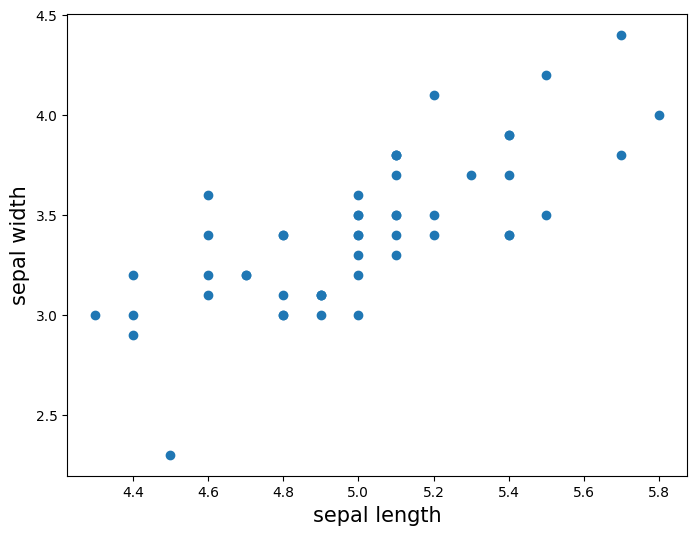

In [4]:
# We create the scatter plot

plt.figure(figsize = (8, 6))

plt.scatter(df['sepal_length'], df['sepal_width'])
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("sepal width", fontsize = 15);

In [5]:
df.cov()

,sepal_length,sepal_width
sepal_length,0.124249,0.100298
sepal_width,0.100298,0.145180


In [6]:
df.corr()

,sepal_length,sepal_width
sepal_length,1.00000,0.74678
sepal_width,0.74678,1.00000


In [7]:
import sys

class MyLinReg(object):
    
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def fit(self, X, y, alpha = 0.001, epochs = 100, tolerance=0.01):
        self.theta = np.random.rand(X.shape[1] + 1)
        self.errors = []
        n = X.shape[0]

        for _ in range(epochs):
            errors = 0
            sum_1 = 0
            sum_2 = 0
            for xi, yi in zip(X, y):
                sum_1 += (self.predict(xi) - yi)*xi
                sum_2 += (self.predict(xi) - yi)
                errors += ((self.predict(xi) - yi)**2)
            self.theta[:-1] -= 2*alpha*sum_1/n
            self.theta[-1] -= 2*alpha*sum_2/n
            self.errors.append(errors/n)
            
            # early stopping
            if(len(self.errors)>2) and (((self.errors[-2]-self.errors[-1])/self.errors[-2])*100 < 1):
                print(f"\n\n \033[1m Percentage change in loss is less than 1%, thereby exiting the loop at epoch {_}\033[0m")
                break
            
        return self

    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)

In [8]:
X = df[['sepal_length']].to_numpy()
X

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ]])

In [9]:
X.shape

(50, 1)

In [10]:
y = df['sepal_width'].to_numpy()
y

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3])

In [11]:
def identity_function(z):
    return z



  Percentage change in loss is less than 1%, thereby exiting the loop at epoch 36


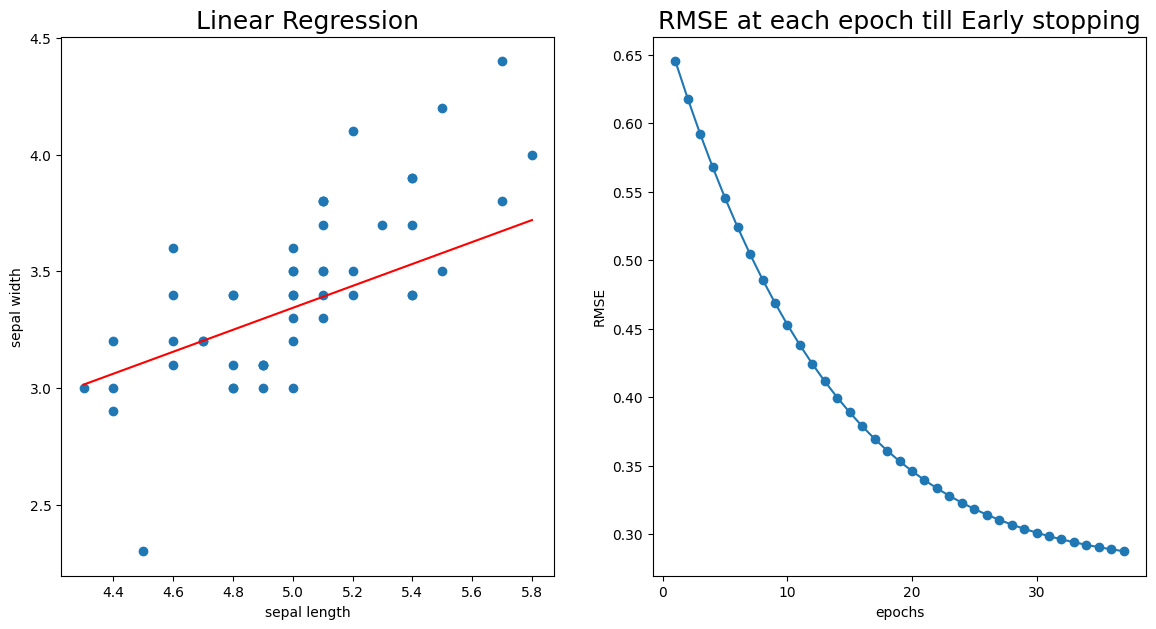

In [12]:
model = MyLinReg(identity_function)
model.fit(X, y)

domain_x = np.linspace(np.min(X), np.max(X), 2)
domain_y = model.predict(domain_x.reshape(-1, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.scatter(X, y)
ax1.plot(domain_x, domain_y, color = "red")
ax1.set_xlabel("sepal length")
ax1.set_ylabel("sepal width")
ax1.set_title("Linear Regression", fontsize = 18)

ax2.plot(range(1, len(model.errors) + 1), 
         np.sqrt(model.errors),
         marker = "o")
ax2.set_xlabel("epochs")
ax2.set_ylabel("RMSE")
ax2.set_xticks(range(0, len(model.errors) + 1, 10))
ax2.set_title("RMSE at each epoch till Early stopping", fontsize = 18);

In [13]:
print(np.sqrt(model.errors))

[0.64535371 0.61783748 0.59203808 0.56787131 0.54525666 0.52411699
 0.50437833 0.48596956 0.46882223 0.45287035 0.43805023 0.42430032
 0.41156111 0.39977505 0.38888644 0.37884147 0.36958812 0.36107624
 0.35325751 0.3460855  0.33951567 0.33350543 0.32801417 0.32300325
 0.31843604 0.31427795 0.31049635 0.30706063 0.3039421  0.301114
 0.2985514  0.29623117 0.2941319  0.29223378 0.2905186  0.2889696
 0.28757139]


### Observation

- Early stopping provides optimal deployment of computing resources and time by halting the loop prematurely, rather than completing the full 100 iterations.


---
### Part 1 

(b) The above class uses batch gradient descent to find the minimum of the loss function. Modify the original code and use the stochastic gradient descent instead. Iterate over many iterations and see how the RMSE changes. The graph of RMSE for the batch gradient descent is smooth and decreasing as the number of iterations increases. What can you say about the graph of RMSE when the stochastic gradient descent is used?

---

In [14]:
import sys

class MyLinReg_Stoch_grad(object):
    
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def fit(self, X, y, alpha = 0.001, epochs = 100, tolerance=0.01):
        self.theta = np.random.rand(X.shape[1] + 1)
        self.errors = []
        n = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for _ in range(n):
                i = np.random.randint(0, n)
                xi, yi = X[i], y[i]
                prediction = self.predict(xi)
                error = prediction - yi
                self.theta[:-1] -= 2 * alpha * error * xi / n
                self.theta[-1] -= 2 * alpha * error / n
                errors += error**2
            self.errors.append(errors/n)

            
        return self

    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)

In [15]:
X = df[['sepal_length']].to_numpy()
X

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ]])

In [16]:
X.shape

(50, 1)

In [17]:
y = df['sepal_width'].to_numpy()
y

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3])

In [18]:
def identity_function(z):
    return z

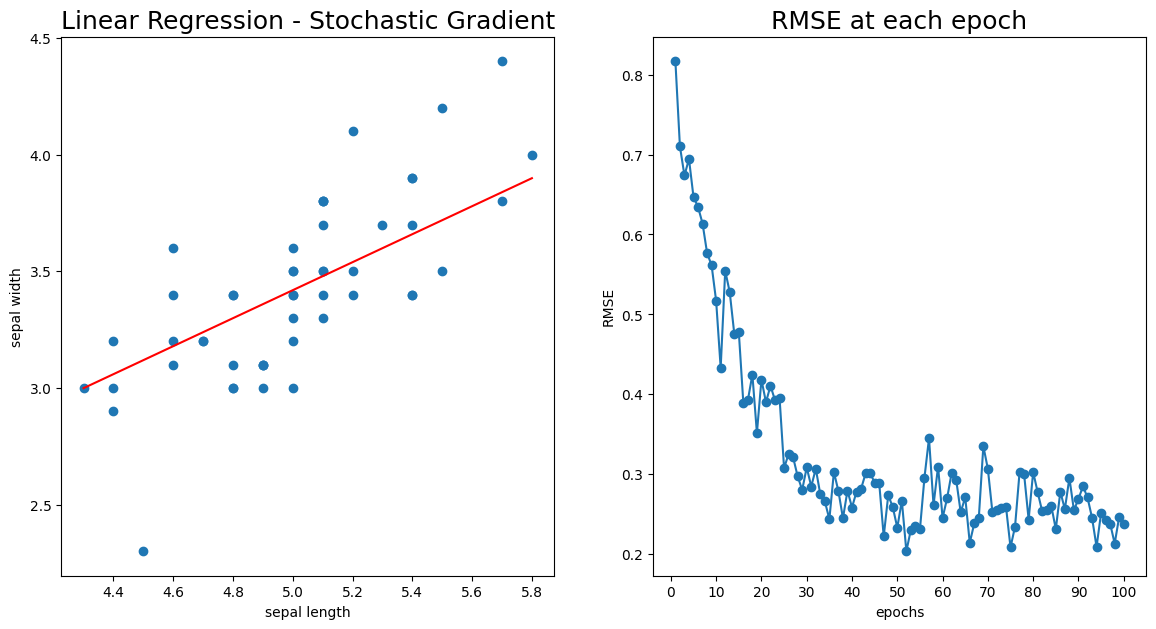

In [19]:
model = MyLinReg_Stoch_grad(identity_function)
model.fit(X, y)

domain_x = np.linspace(np.min(X), np.max(X), 2)
domain_y = model.predict(domain_x.reshape(-1, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.scatter(X, y)
ax1.plot(domain_x, domain_y, color = "red")
ax1.set_xlabel("sepal length")
ax1.set_ylabel("sepal width")
ax1.set_title("Linear Regression - Stochastic Gradient", fontsize = 18)

ax2.plot(range(1, len(model.errors) + 1), 
         np.sqrt(model.errors),
         marker = "o")
ax2.set_xlabel("epochs")
ax2.set_ylabel("RMSE")
ax2.set_xticks(range(0, len(model.errors) + 1, 10))
ax2.set_title("RMSE at each epoch", fontsize = 18);

In [20]:
print(np.sqrt(model.errors))

[0.8168137  0.71031502 0.67382649 0.69450441 0.64688188 0.6344699
 0.61369776 0.57685555 0.56130118 0.51681869 0.43304234 0.55472381
 0.52776652 0.47597986 0.47827686 0.38945234 0.39247993 0.4247874
 0.35163757 0.4183698  0.39017551 0.41069816 0.39252406 0.39574763
 0.30747362 0.32559079 0.32104064 0.29735207 0.28042047 0.30857553
 0.28464349 0.3069836  0.27487183 0.26619692 0.2437489  0.30283676
 0.27886172 0.24496475 0.2795183  0.25840244 0.2783365  0.28173478
 0.30108465 0.3012987  0.28964917 0.28942157 0.22223177 0.27375841
 0.25894494 0.23311098 0.26702053 0.20370108 0.23060569 0.23515915
 0.23106467 0.29594135 0.3450567  0.26134244 0.30966683 0.24541096
 0.2699526  0.30189019 0.29323961 0.25241793 0.27125483 0.21415272
 0.23866879 0.24576186 0.33521207 0.30663007 0.25269811 0.25473019
 0.2573395  0.25932242 0.20857641 0.23457727 0.30264909 0.30001821
 0.24335907 0.30263802 0.27753081 0.25342702 0.25547776 0.26052575
 0.23134845 0.27804804 0.25641604 0.29535839 0.255064   0.269061

**Observations:**

- Stochastic Gradient Descent (SGD) exhibits higher variance and faster convergence due to frequent updates on individual training samples, resulting in a more erratic RMSE curve.
- Batch gradient descent (BGD) achieves smoother convergence by computing gradients throughout the whole training dataset, resulting in a more stable RMSE curve and predictable fall to the minimal error.

### Part 2: 

Solution using ```sklearn SGDRegressor``` class instead of ```sklearn LinearRegression```. 

Input variables are of different scales (here, ```TV``` and ```radio```), scaling those variables improves SGD convergence. Using ```sklearn MinMaxScaler``` tried to get better results.  

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

ads_data = pd.read_csv("advertising_dataset.csv") 

In [22]:
ads_data = ads_data[['TV', 'radio', 'newspaper', 'sales']]

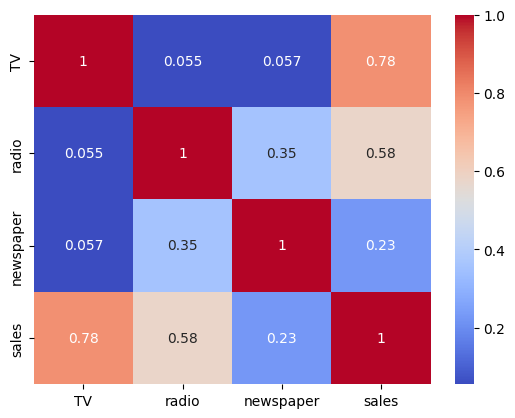

In [23]:
sns.heatmap(data = ads_data.corr(), annot=True, cmap="coolwarm");

In [24]:
X = ads_data[['TV', 'radio']]
y = ads_data['sales']

### SGDRegressor Model without scaling

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sgdRegModel = SGDRegressor(random_state=42)
sgdRegModel.fit(X_train, y_train)

SGDRegressor(random_state=42)

In [26]:
y_train_pred = sgdRegModel.predict(X_train)
y_train_pred

array([1.42133315e+13, 2.14281260e+13, 7.31540801e+12, 8.38212753e+12,
       2.63164625e+13, 4.84995034e+12, 9.62621455e+12, 1.91834534e+13,
       1.27247352e+13, 1.12363091e+13, 1.30483390e+13, 2.02481534e+13,
       5.15167826e+12, 4.22260903e+12, 9.04632384e+12, 1.56043256e+13,
       1.00337864e+13, 3.72350811e+13, 4.04254896e+12, 2.33417945e+13,
       3.39941931e+13, 2.33101594e+13, 1.46532136e+13, 5.76707350e+12,
       3.42013440e+13, 3.68125359e+12, 3.64840507e+13, 3.27839332e+12,
       1.61073115e+13, 6.29765754e+12, 1.25586441e+13, 9.42158597e+12,
       2.34774285e+13, 2.34153348e+13, 1.77473614e+13, 2.61451559e+13,
       1.91178250e+13, 2.51984201e+13, 2.62873504e+13, 3.13071160e+13,
       5.89126428e+12, 1.64509392e+13, 1.13409772e+13, 2.46649744e+13,
       9.76639054e+12, 2.40595056e+13, 1.30121582e+13, 3.47114009e+13,
       8.08478082e+12, 3.39704683e+13, 2.95311030e+12, 2.55193275e+13,
       3.75182942e+13, 3.25979829e+13, 2.70176829e+13, 2.04268680e+13,
      

In [27]:
y_train

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 160, dtype: float64

In [28]:
y_test_pred = sgdRegModel.predict(X_test)
y_test_pred

array([2.16761711e+13, 2.67309373e+13, 3.64522460e+13, 4.51053425e+12,
       2.97293329e+13, 1.17154000e+13, 2.89024094e+13, 6.87148676e+12,
       2.62131392e+13, 2.22959419e+13, 5.79534352e+12, 7.10488927e+12,
       2.76181007e+13, 3.20182781e+12, 1.64802176e+13, 2.05148757e+13,
       3.27401936e+12, 2.49744390e+13, 1.05265076e+13, 2.99420358e+13,
       2.94205395e+13, 1.09997095e+13, 7.84464660e+12, 3.22516660e+13,
       8.88797398e+12, 6.48629532e+12, 2.84450270e+13, 1.74794594e+13,
       1.12073638e+13, 3.32753201e+12, 2.35230309e+13, 9.83471261e+12,
       2.72775077e+13, 5.67502557e+12, 3.38482954e+13, 3.05956321e+13,
       9.59306609e+12, 3.42723598e+13, 1.49298641e+13, 3.43438712e+12])

In [29]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Without Scaling: ")
print(f"Mean Squared Error (Training): {mse_train}")
print(f"Mean Squared Error (Test): {mse_test}")

Without Scaling: 
Mean Squared Error (Training): 4.751747867298671e+26
Mean Squared Error (Test): 4.320703666144973e+26


### SGDRegressor Model with scaling

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[0.38992222, 0.15524194],
       [0.59621238, 0.1875    ],
       [0.14338857, 0.53830645],
       [0.20831924, 0.25403226],
       [0.75515725, 0.0483871 ],
       [0.12681772, 0.07459677],
       [0.23638823, 0.32258065],
       [0.49577274, 0.48185484],
       [0.35136963, 0.11491935],
       [0.25566452, 0.55443548],
       [0.26208996, 0.94354839],
       [0.56712885, 0.14314516],
       [0.02705445, 0.9858871 ],
       [0.02401082, 0.78427419],
       [0.25600271, 0.01612903],
       [0.43523842, 0.11491935],
       [0.24585729, 0.34274194],
       [0.9773419 , 0.85282258],
       [0.06391613, 0.40524194],
       [0.66587758, 0.07056452],
       [0.95908015, 0.21370968],
       [0.62292864, 0.4233871 ],
       [0.37943862, 0.35080645],
       [0.07811972, 0.70766129],
       [0.98072371, 0.08266129],
       [0.06323977, 0.32258065],
       [0.99053094, 0.55846774],
       [0.06087251, 0.24395161],
       [0.45180927, 0.09879032],
       [0.08420697, 0.78629032],
       [0.

In [32]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[0.54988164, 0.63709677],
       [0.65843761, 0.96169355],
       [0.98816368, 0.57056452],
       [0.03719986, 0.74395161],
       [0.74264457, 0.98790323],
       [0.25160636, 0.70564516],
       [0.73080825, 0.88508065],
       [0.16672303, 0.23387097],
       [0.74974636, 0.06854839],
       [0.58978695, 0.45362903],
       [0.10415962, 0.49596774],
       [0.18769023, 0.11491935],
       [0.79066622, 0.06854839],
       [0.01589449, 0.60282258],
       [0.46939466, 0.04233871],
       [0.5732161 , 0.15725806],
       [0.02231992, 0.56653226],
       [0.66587758, 0.46975806],
       [0.25228272, 0.40927419],
       [0.80047345, 0.55443548],
       [0.77375719, 0.65120968],
       [0.22691917, 0.73790323],
       [0.12614136, 0.8125    ],
       [0.84612783, 0.7358871 ],
       [0.23097734, 0.1875    ],
       [0.17855935, 0.04032258],
       [0.71964829, 0.86693548],
       [0.4687183 , 0.29233871],
       [0.29252621, 0.23790323],
       [0.02603991, 0.5483871 ],
       [0.

In [33]:
sgdRegModel = SGDRegressor(random_state=42)
sgdRegModel.fit(X_train_scaled, y_train)

SGDRegressor(random_state=42)

In [34]:
y_train_pred = sgdRegModel.predict(X_train_scaled)
y_train_pred

array([10.04593232, 12.84465853, 10.42566151,  8.7056796 , 13.55261029,
        6.12745149,  9.65325449, 14.22099245,  9.21994765, 11.93628973,
       15.45190435, 12.09844004, 12.96186659, 11.14378498,  7.18515871,
       10.24193829,  9.94673986, 23.36622432,  8.28178743, 12.66059403,
       17.49794553, 15.25397409, 11.64574693, 11.12635634, 16.60403944,
        7.54333834, 20.92669046,  6.81990446, 10.3013844 , 11.89512045,
        9.74145595,  7.19927459, 14.8817186 , 17.13685224, 15.64616279,
       16.20060407, 15.00140788, 19.33244861, 13.82506412, 20.62235083,
       12.77784766, 13.93584011,  9.35394624, 16.88083654,  8.92906358,
       15.13295304, 13.80188154, 22.69380127, 12.8419383 , 22.26711993,
        7.27003075, 18.18124619, 22.57373068, 18.40146527, 17.0163092 ,
       16.40365686, 12.59858109, 12.10548131, 16.76290035, 14.49022469,
       13.26840285,  8.16698167, 18.89383692, 10.01434223, 19.21001574,
       10.49449338,  7.65119954, 16.51621372, 13.87749232, 15.08

In [35]:
y_test_pred = sgdRegModel.predict(X_test_scaled)
y_test_pred

array([16.25170605, 20.44192369, 21.00470354, 10.9483026 , 21.69956438,
       13.2225835 , 20.64702528,  8.02070589, 13.66477473, 15.11727194,
        9.57362505,  7.22541754, 14.16340726,  9.44198874, 10.01699465,
       12.2972863 ,  9.19970763, 16.18696064, 10.61276529, 18.57510794,
       19.10443123, 13.20671453, 12.63764489, 20.7343274 ,  8.39405414,
        6.45518493, 20.35074519, 12.21718441,  9.58931171,  9.08474847,
       12.5909651 , 10.39700843, 20.88892509, 12.37366636, 17.93731982,
       19.81915078, 14.25536615, 20.32034458, 11.34207875,  5.3125034 ])

In [36]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print('After scaling: ')
print(f"Mean Squared Error (Training): {mse_train}")
print(f"Mean Squared Error (Test): {mse_test}")

After scaling: 
Mean Squared Error (Training): 2.8383763745021957
Mean Squared Error (Test): 3.4934869637935746


In [37]:
sgdRegModel.coef_, sgdRegModel.intercept_

(array([12.18558998,  8.83372647]), array([3.92313525]))

### **Results:**

Before Scaling: 
- Mean Squared Error (Training): 4.751747867298671e+26
- Mean Squared Error (Test): 4.320703666144973e+26

After Scaling: 
- Mean Squared Error (Training): 2.8383763745021957
- Mean Squared Error (Test): 3.4934869637935746

Observation:

- The MSE(Mean Squared Error) before scaling is too high, suggesting poor generalization of the model. ***Scaling*** the features led to a more stable and well-performing model, as indicated by the significant reduction in MSE on the training set.

### Part 3: 

Using the data file ```mtcars.csv```. The goal is
to determine two or three continuous numerical variables that can be used to predict mpg
(miles per gallon) using multiple linear regression. You can use ```sklearn``` or custom class; batch GD, SGD, or mini-batch SGD; 
and scaling. 

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mtcars=pd.read_csv("mtcars.csv")
mtcars

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [39]:
mtcars.shape

(32, 12)

In [40]:
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [41]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [42]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


Using all the continuous variables 

In [43]:
mtcars=mtcars[['mpg', 'disp', 'drat', 'wt', 'qsec']]
mtcars.head()

,mpg,disp,drat,wt,qsec
0,21.0,160.0,3.90,2.620,16.46
1,21.0,160.0,3.90,2.875,17.02
2,22.8,108.0,3.85,2.320,18.61
3,21.4,258.0,3.08,3.215,19.44
4,18.7,360.0,3.15,3.440,17.02


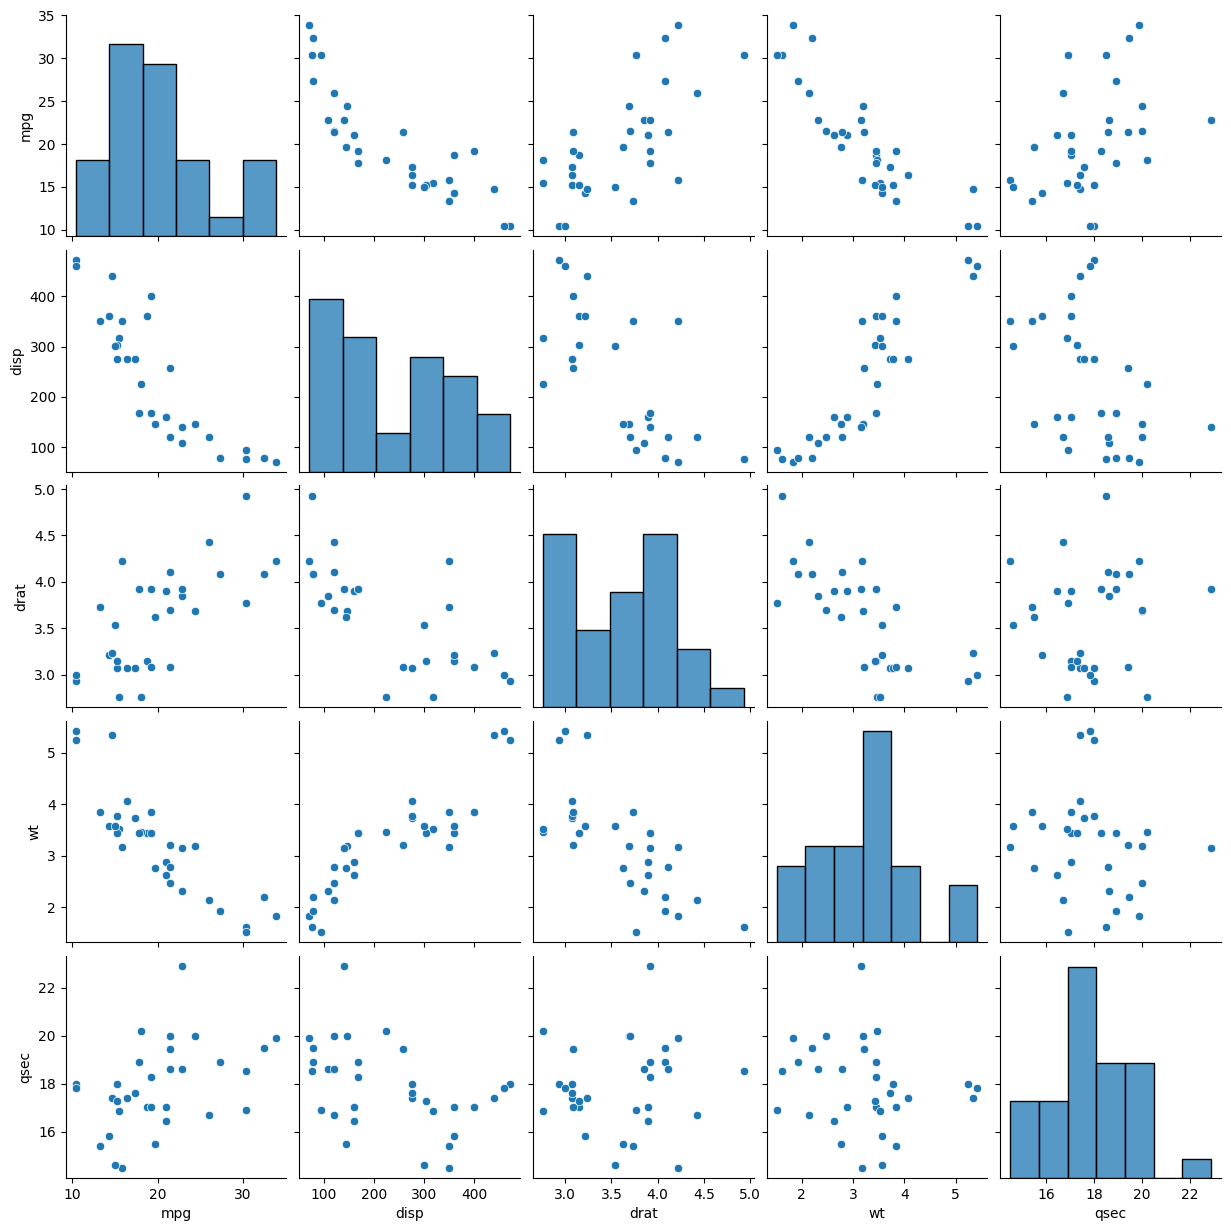

In [44]:
import seaborn as sns
sns.pairplot(mtcars)

In [45]:
corr_matrix=np.round(mtcars.corr(),2)
corr_matrix

,mpg,disp,drat,wt,qsec
mpg,1.00,-0.85,0.68,-0.87,0.42
disp,-0.85,1.00,-0.71,0.89,-0.43
drat,0.68,-0.71,1.00,-0.71,0.09
wt,-0.87,0.89,-0.71,1.00,-0.17
qsec,0.42,-0.43,0.09,-0.17,1.00


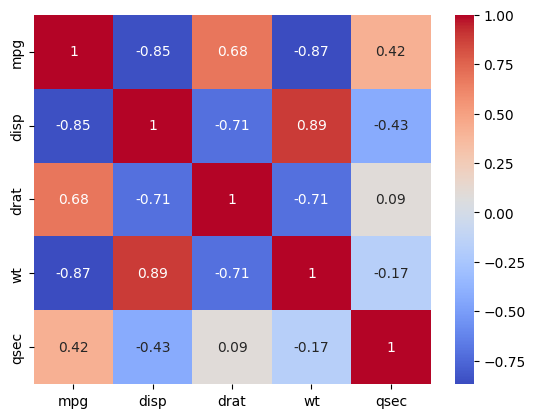

In [46]:
sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm");

### Varaibles for predcting mpg:

From the scatter plot and correlation matrix, we can conclude that **"disp"** and **"wt"** continuous variables and **SGD regressor** can be used in building a linear model for modelling mpg. 

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

X = mtcars[['disp', 'wt']] #"disp" and "wt" => continuous variables
Y = mtcars['mpg']

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [49]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [50]:
sgd_model = SGDRegressor(max_iter=2000)
sgd_model.fit(X_train_scaled, Y_train)

SGDRegressor(max_iter=2000)

In [51]:
Y_train_predicted = sgd_model.predict(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
Y_test_predicted = sgd_model.predict(X_test_scaled)

In [52]:
MSE_train = mean_squared_error(Y_train, Y_train_predicted)
MSE_test = mean_squared_error(Y_test, Y_test_predicted)

print(f"Root mean square error for the training data: {np.sqrt(MSE_train)}\n")
print(f"Root mean square error for the test data: {np.sqrt(MSE_test)}")

Root mean square error for the training data: 2.8191224199654727

Root mean square error for the test data: 3.065997848326612


In [53]:
w = sgd_model.coef_
b = sgd_model.intercept_

#Evaluating weight and bias from the trained model
print("weight :",w,"\nbias : ", b)

weight : [-9.98017926 -6.9776813 ] 
bias :  [26.95451317]
